### Predicting Health Insurance Premiums (based on customer charges). 


We are using a dataset that contains information about potential health insurance customers such as age, smoking history and bmi. We will use the 'cost' column to predict how much a potential customer may spend on health care needs. This spending trend could be used by health insurance companies to determine what an appropriate health insurance premium should be. 

In [1]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [3]:
#Load csv file into Pandas DataFrame
h_data = pd.read_csv("Resources/Health_insurance.csv")

#View DataFrame
h_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Check if DataFrame contains any null values
h_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#Check DataFrame info
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Get basic statistics on the dataframe
h_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Explore sex column to see if male to female ratio is balanced
h_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

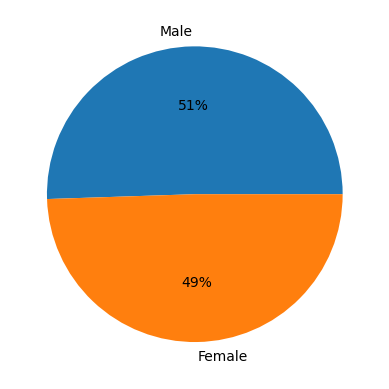

In [15]:
#Visualize Male and Female distribution
plt.pie(h_data['sex'].value_counts(), labels = ['Male', 'Female'], autopct='%.0f%%')
plt.show()

In [16]:
#Explore smoker column
h_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

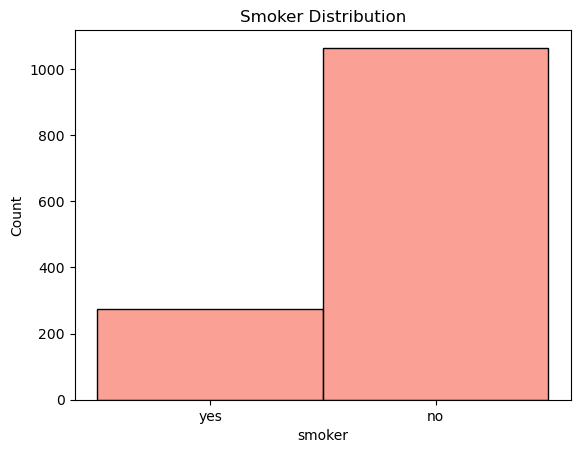

In [18]:
#Visualize smoker distribution
#Seaborn visualization
sns.histplot(h_data['smoker'], color='salmon').set(title = 'Smoker Distribution')
plt.show()

In [19]:
#Create some basic visuals using plotly.express to view some of the data
smoker_by_sex_chart = px.histogram(h_data, x = "smoker", color = "sex", title = "Number of Smokers")
smoker_by_sex_chart.show()

In [20]:
#Finding values of age column
h_data["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

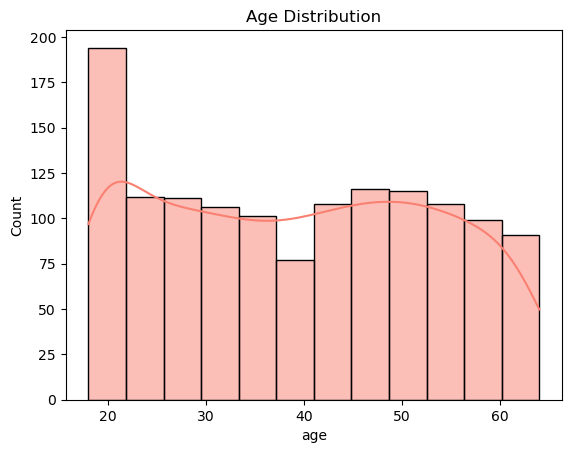

In [21]:
#Seaborn visualization
#Create a visual that shows the range of ages in the data set
sns.histplot(h_data['age'], kde=True, color='salmon').set(title = 'Age Distribution')
plt.show()

In [22]:
#Check use .describe() to see the range of values of the bmi column
h_data["bmi"].describe()
#From national institutes of health https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf
#"Normal" is 19-24, "Overweight" is 25-29, "Obese" is 30-39, "Extreme Obesity" is 40+

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

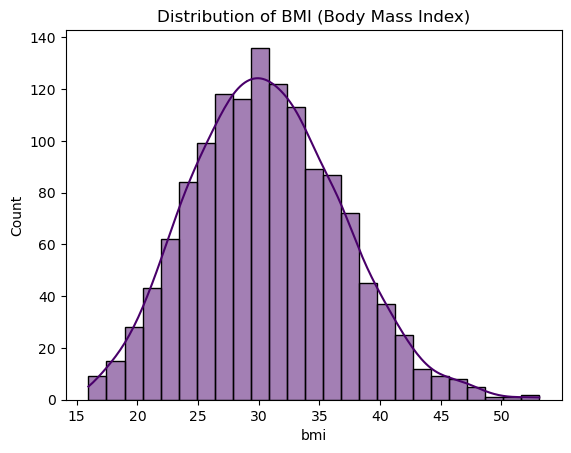

In [23]:
#Visual for the BMI distribution
sns.histplot(h_data['bmi'], kde=True, color='#49006a').set(title= 'Distribution of BMI (Body Mass Index)')
plt.show()

In [26]:
#Explore the number of kids column
h_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

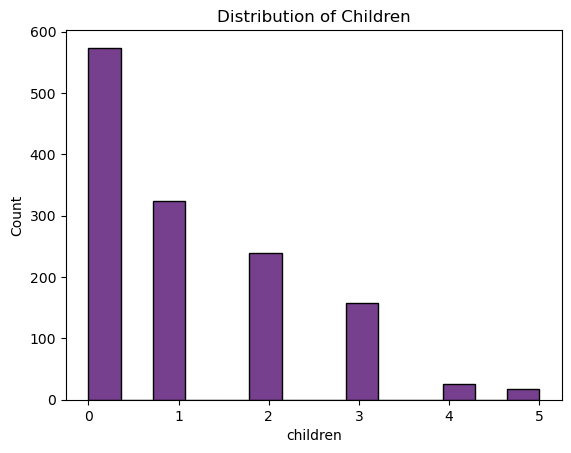

In [27]:
#Visual for the children distribution
sns.histplot(h_data['children'], color='#49006a').set(title= 'Distribution of Children')
plt.show()

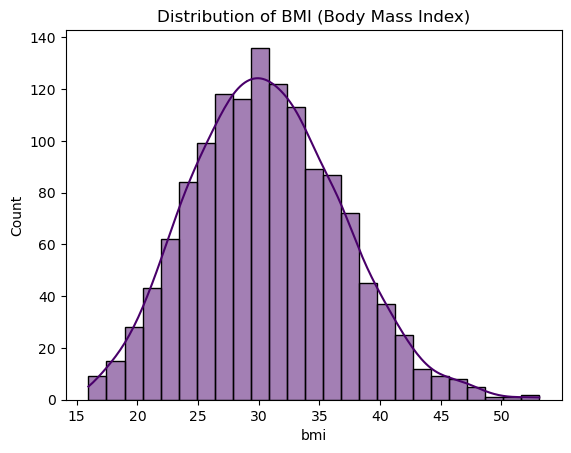

In [28]:
#Visual for the BMI distribution
sns.histplot(h_data['bmi'], kde=True, color='#49006a').set(title= 'Distribution of BMI (Body Mass Index)')
plt.show()

In [29]:
#This visual could also be a pie chart
pie_regions = h_data["region"].value_counts()
regions = pie_regions.index
population = pie_regions.values
pie = px.pie(h_data, values=population, names=regions, title = "Percentage of Customers by Region")
pie.show()

In [30]:
#Explore the 'charges' column (this is the column we are thinking about using as the target variable)
h_data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

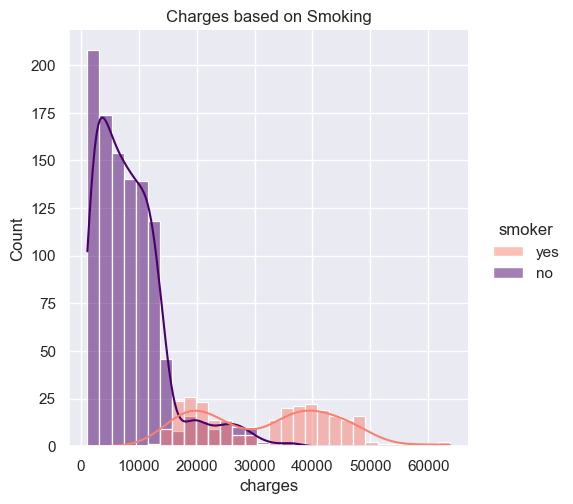

In [31]:
palette = ["salmon", '#49006a']
sns.set()
sns.displot(h_data, x='charges', hue='smoker',kde=True, palette=palette).set(title= 'Charges based on Smoking')
plt.show()

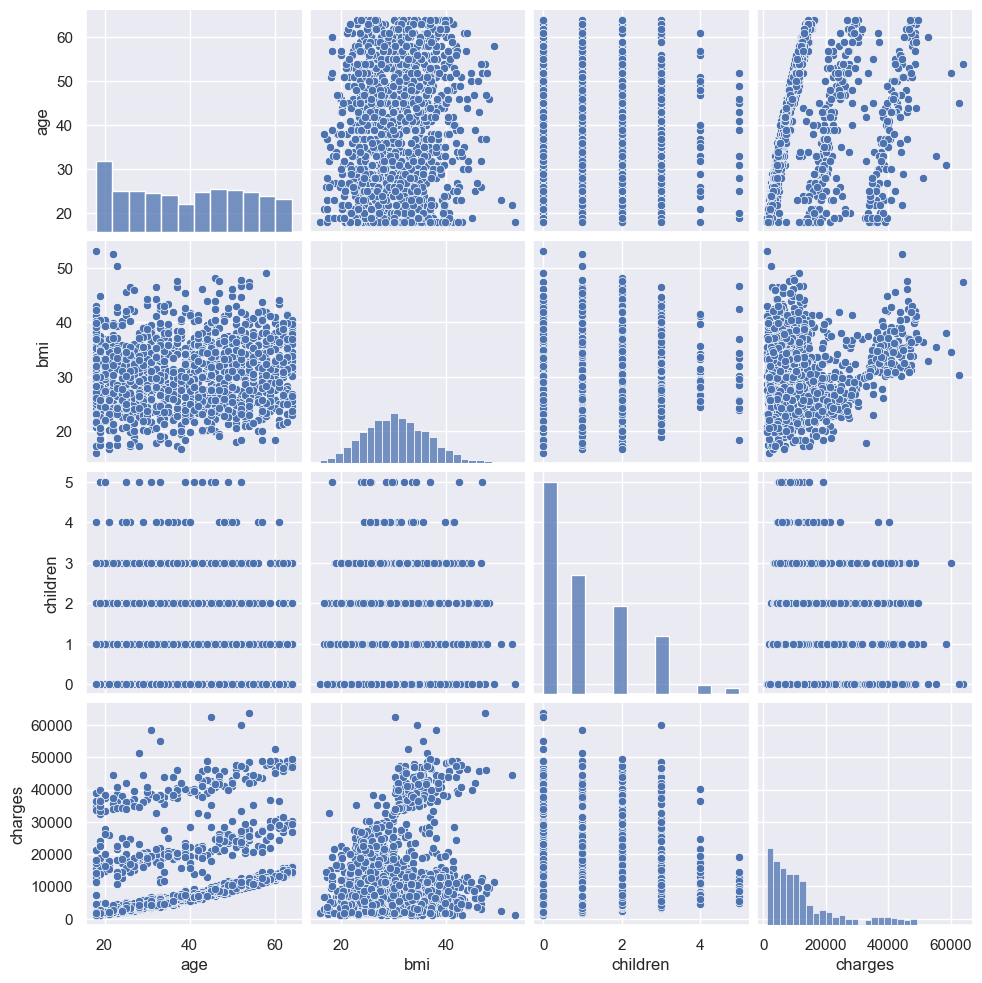

In [33]:
#Create a scatter matrix/pair plot with numeric data
numeric_features = ['age', 'bmi', 'children', 'charges']
sns.pairplot(h_data[numeric_features])
plt.show()